In [1]:
import numpy as np
import os
import netCDF4
from scipy import fftpack as fft
from scipy import linalg as lin
from scipy import signal as sig
from scipy import interpolate as naiso
from scipy import io
from matplotlib import pyplot as plt
%matplotlib inline
from sstanalysis import popmodel
reload(popmodel)

<module 'sstanalysis.popmodel' from 'sstanalysis/popmodel.pyc'>

In [2]:
base_dir = '/data/scratch/takaya/POP_data/'
fname = os.path.join(base_dir, 'hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Jan.timeavg.nc')

ds = netCDF4.Dataset(fname)

In [3]:
ds

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT data model, file format NETCDF3):
    title: hybrid_v5_rel04_BC5_ne120_t12_pop62
    history: Thu Sep 24 11:54:53 2015: ncra /glade/p/ncgd0001/hybrid_v5_rel04_BC5_ne120_t12_pop62/ocn-hist/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-01.nc /glade/p/ncgd0001/hybrid_v5_rel04_BC5_ne120_t12_pop62/ocn-hist/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0051-01.nc /glade/p/ncgd0001/hybrid_v5_rel04_BC5_ne120_t12_pop62/ocn-hist/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0052-01.nc /glade/p/ncgd0001/hybrid_v5_rel04_BC5_ne120_t12_pop62/ocn-hist/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0053-01.nc /glade/p/ncgd0001/hybrid_v5_rel04_BC5_ne120_t12_pop62/ocn-hist/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0054-01.nc /glade/p/ncgd0001/hybrid_v5_rel04_BC5_ne120_t12_pop62/ocn-hist/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0055-01.nc /glade/p/ncgd0001/hybrid_v5_rel04_BC5_ne120_t12_pop62/ocn-hist/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0056-01.nc /gl

In [4]:
SST = ds['TEMP'][:,0]
maskT = ds['KMT'][:] <= 1
maskU = ds['KMU'][:] <= 1
lat = ds['TLAT'][:]
lon = ds['TLONG'][:]
print SST.shape

(1, 2400, 3600)


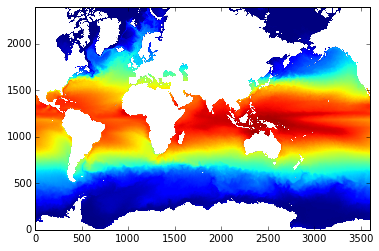

In [178]:
plt.figure()
plt.imshow(np.ma.masked_array(SST[0], maskT), origin='bottom')

In [5]:
winter = np.array(['Jan', 'Feb', 'Mar'])
summer = np.array(['Jul', 'Aug', 'Sep'])
# print winter

SST_win = np.copy(lat)
SST_sum = np.copy(lon)
SST_win[:] = 0.
SST_sum[:] = 0.
SSS_win = SST_win.copy()
SSS_sum = SST_sum.copy()
U_win = SST_win.copy()
U_sum = SST_sum.copy()
V_win = SST_win.copy()
V_sum = SST_sum.copy()
KE_win = SST_win.copy()
KE_sum = SST_sum.copy()

for month in winter:
    fname = os.path.join(base_dir, 'hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.%3s.timeavg.nc' % month)
    print fname
    ds = netCDF4.Dataset(fname)
    SST_win += ds['TEMP'][0,0]
    SSS_win += ds['SALT'][0,0]
    U_win += ds['UVEL'][0,0]
    V_win += ds['VVEL'][0,0]
    KE_win += ds['KE'][0,0]
    
#     plt.figure()
#     plt.imshow(ds['TEMP'][0,0], origin='bottom')
#     plt.show()

SST_win /= len(winter)
SSS_win /= len(winter)
U_win /= len(winter)
V_win /= len(winter)
KE_win /= len(winter)

for month in summer:
    fname = os.path.join(base_dir, 'hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.%3s.timeavg.nc' % month)
    print fname
    ds = netCDF4.Dataset(fname)
    SST_sum += ds['TEMP'][0,0]
    SSS_sum += ds['SALT'][0,0]
    U_sum += ds['UVEL'][0,0]
    V_sum += ds['VVEL'][0,0]
    KE_sum += ds['KE'][0,0]
#     plt.figure()
#     plt.imshow(ds['TEMP'][0,0], origin='bottom')
#     plt.show()

SST_sum /= len(summer)
SSS_sum /= len(summer)
U_sum /= len(summer)
V_sum /= len(summer)
KE_sum /= len(summer)

/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Jan.timeavg.nc
/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Feb.timeavg.nc
/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Mar.timeavg.nc
/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Jul.timeavg.nc
/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Aug.timeavg.nc
/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Sep.timeavg.nc


In [180]:
year = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# print winter

SST_year = np.copy(lat)
SST_year[:] = 0.
SSS_year = SST_year.copy()
U_year = SST_year.copy()
V_year = SST_year.copy()
KE_year = SST_year.copy()


for month in year:
    fname = os.path.join(base_dir, 'hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.%3s.timeavg.nc' % month)
    print fname
    ds = netCDF4.Dataset(fname)
    SST_year += ds['TEMP'][0,0]
    SSS_year += ds['SALT'][0,0]
    U_year += ds['UVEL'][0,0]
    V_year += ds['VVEL'][0,0]
    KE_year += ds['KE'][0,0]
    
SST_year /= len(year)
SSS_year /= len(year)
U_year /= len(year)
V_year /= len(year)
KE_year /= len(year)

/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Jan.timeavg.nc
/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Feb.timeavg.nc
/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Mar.timeavg.nc
/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Apr.timeavg.nc
/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Jun.timeavg.nc
/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Jul.timeavg.nc
/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Aug.timeavg.nc
/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Sep.timeavg.nc
/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Oct.timeavg.nc
/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Nov.timeavg.nc
/data/scratch/takaya/POP_data/

In [181]:
from tempfile import TemporaryFile
POP_Seasonal_Climatology_Passive = TemporaryFile()
np.savez('POP_Seasonal_Climatology_Passive', SST_winter=SST_win, SST_summer=SST_sum, 
         SSS_winter=SSS_win, SSS_summer=SSS_sum, 
         dx=ds['DXT'][:], dy=ds['DYT'][:], Lat=ds['TLAT'], Lon=ds['TLONG'], maskT=maskT)
POP_Seasonal_Climatology_Passive.seek(0)

from tempfile import TemporaryFile
POP_Seasonal_Climatology_Active = TemporaryFile()
np.savez('POP_Seasonal_Climatology_Active', U_winter=U_win, U_summer=U_sum, 
         V_winter=V_win, V_summer=V_sum, KE_winter=KE_win, KE_summer=KE_sum,
         dx=ds['DXU'][:], dy=ds['DYU'][:], Lat=ds['ULAT'], Lon=ds['ULONG'], maskU=maskU)
POP_Seasonal_Climatology_Active.seek(0)

In [182]:
from tempfile import TemporaryFile
POP_Annual_Climatology_Tracer = TemporaryFile()
np.savez('POP_Annual_Climatology_Tracer', SST_year=SST_year, SSS_year=SSS_year, 
         V_year=V_year, U_year=U_year, KE_year=KE_year, 
         dxU=ds['DXU'][:], dyU=ds['DYU'][:], LatU=ds['ULAT'], LonU=ds['ULONG'], maskU=maskU,
         dxT=ds['DXT'][:], dyT=ds['DYT'][:], LatT=ds['TLAT'], LonT=ds['TLONG'], maskT=maskT)
POP_Annual_Climatology_Tracer.seek(0)

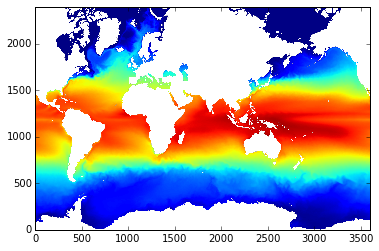

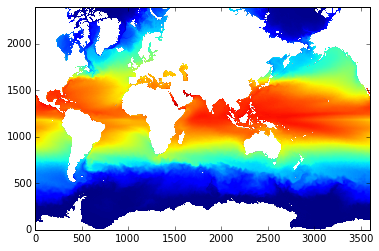

In [183]:
plt.figure()
plt.imshow(np.ma.masked_array(SST_win, maskT), origin='bottom')

plt.figure()
plt.imshow(np.ma.masked_array(SST_sum, maskT), origin='bottom')

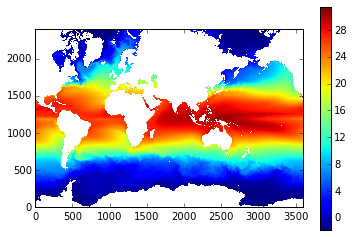

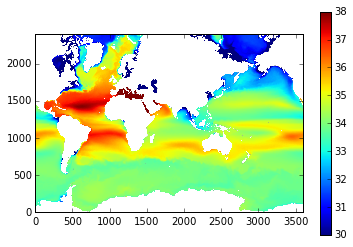

In [187]:
plt.figure()
plt.imshow(np.ma.masked_array(SST_year, maskT), origin='bottom')
plt.colorbar()

plt.figure()
plt.imshow(np.ma.masked_array(SSS_year, maskT), origin='bottom')
plt.colorbar()
plt.clim(30., 38.)

In [6]:
dlat, dlon = (10., 10.)
lat_start, lat_end = (-60., 50.)
lon_start, lon_end = (5., 345.)
west, south = (lon_start, lat_start)
east, north = (west+dlon, south+dlat)
Degx, Degy = (int((lon_end-lon_start)/dlon), int((lat_end-lat_start)/dlat))
# lon_global = np.arange(lon_start, lon_end+2*dlon, dlon)
# lat_global = np.arange(lat_start, lat_end+2*dlat, dlat)
# Lon_global, Lat_global = np.meshgrid(lon_global, lat_global)
# base_dir = '/home/../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/'

print Degx, Degy, (Degx+1)*(Degy+1)
# print Lon_global.shape

34 11 420


In [7]:
roll = -1080

# fname = base_dir + 'hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0046-02-01.nc'
# f = netCDF4.Dataset(fname)
mask = ds.variables['KMT'][:] <= 1
#SSH = 1e-2*f.variables['SSH_2'][:]
tlon = np.roll(np.ma.masked_array(ds.variables['TLONG'][:],mask), roll, axis=1)
tlat = np.roll(np.ma.masked_array(ds.variables['TLAT'][:],mask), roll, axis=1)


lonrange=np.array([lon_start, lon_end])
latrange=np.array([lat_start, lat_end+5.])
lonmask = (tlon >= lonrange[0]) & (tlon < lonrange[1])
latmask = (tlat >= latrange[0]) & (tlat < latrange[1])
boxidx = lonmask & latmask # this won't necessarily be square
irange = np.where(boxidx.sum(axis=0))[0]
imin_bound, imax_bound = irange.min(), irange.max()
jrange = np.where(boxidx.sum(axis=1))[0]
jmin_bound, jmax_bound = jrange.min(), jrange.max()


In [8]:
npzfile = np.load('interpLatnLon.npz')
print npzfile.files
tlat = npzfile['arr_0']
tlon = npzfile['arr_1']

['arr_1', 'arr_0']


# $ \big| \nabla \bar{q} \big|^2 $

## Salinity

### Seasonal

In [11]:
npzfile = np.load('POP_Seasonal_Climatology_Passive.npz')
print npzfile.files
SSS_win = np.roll( npzfile['SSS_winter'].copy(), roll, axis=1 )[..., jmin_bound:jmax_bound+100, imin_bound:imax_bound+100]
SSS_sum = np.roll( npzfile['SSS_summer'].copy(), roll, axis=1 )[..., jmin_bound:jmax_bound+100, imin_bound:imax_bound+100]
mask = np.roll( npzfile['maskT'].copy(), roll, axis=1 )[jmin_bound:jmax_bound+100, imin_bound:imax_bound+100]
lat = np.roll( npzfile['Lat'].copy(), roll, axis=1 )[jmin_bound:jmax_bound+100, imin_bound:imax_bound+100]
lon = np.roll( npzfile['Lon'].copy(), roll, axis=1 )[jmin_bound:jmax_bound+100, imin_bound:imax_bound+100]
dxT = np.roll( npzfile['dx'].copy(), roll, axis=1 )[jmin_bound:jmax_bound+100, imin_bound:imax_bound+100]
dyT = np.roll( npzfile['dy'].copy(), roll, axis=1 )[jmin_bound:jmax_bound+100, imin_bound:imax_bound+100]

npzfile = np.load('POP_Seasonal_Climatology_Active.npz')
print npzfile.files
dxU = np.roll( npzfile['dx'].copy(), roll, axis=1 )[jmin_bound:jmax_bound+100, imin_bound:imax_bound+100]
dyU = np.roll( npzfile['dy'].copy(), roll, axis=1 )[jmin_bound:jmax_bound+100, imin_bound:imax_bound+100]

['SST_winter', 'maskT', 'Lon', 'SSS_winter', 'SST_summer', 'SSS_summer', 'dx', 'dy', 'Lat']
['KE_summer', 'dx', 'maskU', 'KE_winter', 'U_winter', 'Lon', 'U_summer', 'V_summer', 'V_winter', 'dy', 'Lat']


In [12]:
print SSS_win[:, 1:-1].shape, SSS_win[:, :-2].shape

(1578, 3521) (1578, 3521)


In [13]:
Variance_winter_SSS = np.zeros((Degy+1, Degx+1))
Variance_summer_SSS = np.zeros((Degy+1, Degx+1))

In [15]:
crit = 0.01
j,i = (0,0)
west, south = (lon_start, lat_start)
east, north = (west+dlon, south+dlat)

while south < lat_end+dlat:
#     print i,j
    west = lon_start
    east = west+dlon
    i = 0
    while west < lon_end+dlon:

        lonrange = np.array([west,east])
        latrange = np.array([south,north])
        lonmask = (tlon >= lonrange[0]) & (tlon < lonrange[1])
        latmask = (tlat >= latrange[0]) & (tlat < latrange[1])
        boxidx = lonmask & latmask # this won't necessarily be square
        irange = np.where(boxidx.sum(axis=0))[0]
        imin, imax = irange.min(), irange.max()
        jrange = np.where(boxidx.sum(axis=1))[0]
        jmin, jmax = jrange.min(), jrange.max()
            #print imin, imax, jmin, jmax
        
        
        region_mask = mask[jmin-1:jmax+1, imin-1:imax+1]
        Ny, Nx = region_mask[1:-1,1:-1].shape
        land_fraction = region_mask[1:-1,1:-1].sum().astype('f8') / (Ny*Nx)
            #SSH_domain = SSH[..., jmin:jmax, imin:imax]

    
        if land_fraction < crit:
#             print 'Ok'
            
            dxT_dom = dxT[jmin:jmax, imin-1:imax].copy()
            dyT_dom = dyT[jmin-1:jmax, imin:imax].copy()
            dxU_dom = dxU[jmin:jmax, imin-1:imax].copy()
            dyU_dom = dyU[jmin-1:jmax, imin:imax].copy()
#             k = 2*np.pi*fft.fftshift(fft.fftfreq(Nx, dx_dom[Ny/2,Nx/2]))
#             l = 2*np.pi*fft.fftshift(fft.fftfreq(Ny, dy_dom[Ny/2,Nx/2]))
#             dk = np.diff(k)[0]*.5/np.pi
#             dl = np.diff(l)[0]*.5/np.pi
                        
#=#=#=#=#=#=#=#=#=#=#=#=#=#
#         Winter
            Ti = np.ma.masked_array(SSS_win[jmin-1:jmax+1, imin-1:imax+1].copy(), region_mask)
            
#         Interpolate gaps if necessary
#             if land_fraction > 0. and land_fraction < crit:
#                 x = np.arange(0,Nx)
#                 y = np.arange(0,Ny)
#                 X,Y = np.meshgrid(x,y)
#                 Zr = Ti.ravel()
#                 Xr = np.ma.masked_array(X.ravel(), Zr.mask)
#                 Yr = np.ma.masked_array(Y.ravel(), Zr.mask)
#                 Xm = np.ma.masked_array( Xr.data, ~Xr.mask ).compressed()
#                 Ym = np.ma.masked_array( Yr.data, ~Yr.mask ).compressed()
#                 Zm = naiso.griddata(np.array([Xr.compressed(), Yr.compressed()]).T, 
#                                         Zr.compressed(), np.array([Xm,Ym]).T, method='nearest')
#                 Znew = Zr.data
#                 Znew[Zr.mask] = Zm
#                 Znew.shape = Ti.shape
#                 Ti = Znew
#             elif land_fraction == 0.:
#                         # no problem
#                 pass
#             else:
#                 break
        
#             # Detrend the data in two dimensions (least squares plane fit)
#             d_obs = np.reshape(Ti, (Nx*Ny,1))
#             G = np.ones((Ny*Nx,3))
#             for n in range(Ny):
#                 G[Nx*n:Nx*n+Nx, 0] = n+1
#                 G[Nx*n:Nx*n+Nx, 1] = np.arange(1, Nx+1)    
#             m_est = np.dot(np.dot(lin.inv(np.dot(G.T, G)), G.T), d_obs)
#             d_est = np.dot(G, m_est)
#             Lin_trend = np.reshape(d_est, (Ny, Nx))
#             Ti -= Lin_trend

#             # Window the data
#             # Hanning window
#             windowx = sig.hann(Nx)
#             windowy = sig.hann(Ny)
#             window = windowx*windowy[:,np.newaxis] 
#             Ti *= window
#             print Ti.shape, dxU_dom.shape, dyU_dom.shape
    
            TiX = .5 * ( (Ti[1:-1,2:] - Ti[1:-1,1:-1])/dxU_dom[:,1:] + (Ti[1:-1,1:-1] - Ti[1:-1,:-2])/dxU_dom[:,:-1] )
            TiY = .5 * ( (Ti[2:,1:-1] - Ti[1:-1,1:-1])/dyU_dom[1:] + (Ti[1:-1,1:-1] - Ti[:-2,1:-1])/dyU_dom[:-1] )
                        
            Var_win = ( TiX**2 + TiY**2 ).sum()

#=#=#=#=#=#=#=#=#=#=#=#=#

#          Summer
            Ti = np.ma.masked_array(SSS_sum[jmin-1:jmax+1, imin-1:imax+1].copy(), region_mask)
             
#         Interpolate gaps if necessary
#             if land_fraction > 0. and land_fraction < crit:
#                 x = np.arange(0,Nx)
#                 y = np.arange(0,Ny)
#                 X,Y = np.meshgrid(x,y)
#                 Zr = Ti.ravel()
#                 Xr = np.ma.masked_array(X.ravel(), Zr.mask)
#                 Yr = np.ma.masked_array(Y.ravel(), Zr.mask)
#                 Xm = np.ma.masked_array( Xr.data, ~Xr.mask ).compressed()
#                 Ym = np.ma.masked_array( Yr.data, ~Yr.mask ).compressed()
#                 Zm = naiso.griddata(np.array([Xr.compressed(), Yr.compressed()]).T, 
#                                         Zr.compressed(), np.array([Xm,Ym]).T, method='nearest')
#                 Znew = Zr.data
#                 Znew[Zr.mask] = Zm
#                 Znew.shape = Ti.shape
#                 Ti = Znew
#             elif land_fraction == 0.:
#                 # no problem
#                 pass
#             else:
#                 break

            NyT, NxT = Ti.shape
            # Derive the linear trend (least squares plane fit)
            d_obs = np.reshape(Ti, (NxT*NyT,1))
            G = np.ones((NyT*NxT,3))
            for n in range(NyT):
                G[NxT*n:NxT*n+NxT, 0] = n+1
                G[NxT*n:NxT*n+NxT, 1] = np.arange(1, NxT+1)    
            m_est = np.dot(np.dot(lin.inv(np.dot(G.T, G)), G.T), d_obs)
            d_est = np.dot(G, m_est)
            Lin_trend = np.reshape(d_est, (NyT, NxT))
            Ti = Lin_trend

#             # Window the data
#             # Hanning window
#             windowx = sig.hann(Nx)
#             windowy = sig.hann(Ny)
#             window = windowx*windowy[:,np.newaxis] 
#             Ti *= window
            TiX = .5 * ( (Ti[1:-1,2:] - Ti[1:-1,1:-1])/dxU_dom[:,1:] + (Ti[1:-1,1:-1] - Ti[1:-1,:-2])/dxU_dom[:,:-1] )
            TiY = .5 * ( (Ti[2:,1:-1] - Ti[1:-1,1:-1])/dyU_dom[1:] + (Ti[1:-1,1:-1] - Ti[:-2,1:-1])/dyU_dom[:-1] )
                        
            Var_sum = ( TiX**2 + TiY**2 ).sum()

            Variance_winter_SSS[j,i] = Var_win
            Variance_summer_SSS[j,i] = Var_sum
              
        else:
            Variance_winter_SSS[j,i] = np.NAN
            Variance_summer_SSS[j,i] = np.NAN

#         print i,j
        west = east
        east = west+dlon
        i += 1
    
    south = north
    north = south+dlat
    j += 1
    

-c:27: RuntimeWarning: invalid value encountered in double_scalars


In [16]:
from tempfile import TemporaryFile
POP_Seasonal_Climatology_gradSSS = TemporaryFile()
np.savez('POP_Seasonal_Climatology_gradSSS', grad2SSS_win=Variance_winter_SSS, grad2SSS_sum=Variance_summer_SSS)
POP_Seasonal_Climatology_gradSSS.seek(0)

### Annual

In [17]:
npzfile = np.load('POP_Annual_Climatology_Tracer.npz')
print npzfile.files
SSS_year = np.roll( npzfile['SSS_year'].copy(), roll, axis=1 )[..., jmin_bound:jmax_bound+100, imin_bound:imax_bound+100]
maskT = np.roll( npzfile['maskT'].copy(), roll, axis=1 )[jmin_bound:jmax_bound+100, imin_bound:imax_bound+100]
latT = np.roll( npzfile['LatT'].copy(), roll, axis=1 )[jmin_bound:jmax_bound+100, imin_bound:imax_bound+100]
lonT = np.roll( npzfile['LonT'].copy(), roll, axis=1 )[jmin_bound:jmax_bound+100, imin_bound:imax_bound+100]
dxT = np.roll( npzfile['dxT'].copy(), roll, axis=1 )[jmin_bound:jmax_bound+100, imin_bound:imax_bound+100]
dyT = np.roll( npzfile['dyT'].copy(), roll, axis=1 )[jmin_bound:jmax_bound+100, imin_bound:imax_bound+100]

['LatU', 'LatT', 'maskU', 'dyU', 'dxU', 'dxT', 'V_year', 'dyT', 'SSS_year', 'U_year', 'maskT', 'SST_year', 'LonU', 'LonT', 'KE_year']


In [18]:
Variance_year_SSS = np.zeros((Degy+1, Degx+1))

In [21]:
crit = 0.01
j,i = (0,0)
west, south = (lon_start, lat_start)
east, north = (west+dlon, south+dlat)

while south < lat_end+dlat:
#     print i,j
    west = lon_start
    east = west+dlon
    i = 0
    while west < lon_end+dlon:

        lonrange = np.array([west,east])
        latrange = np.array([south,north])
        lonmask = (tlon >= lonrange[0]) & (tlon < lonrange[1])
        latmask = (tlat >= latrange[0]) & (tlat < latrange[1])
        boxidx = lonmask & latmask # this won't necessarily be square
        irange = np.where(boxidx.sum(axis=0))[0]
        imin, imax = irange.min(), irange.max()
        jrange = np.where(boxidx.sum(axis=1))[0]
        jmin, jmax = jrange.min(), jrange.max()
            #print imin, imax, jmin, jmax
        
        
        region_mask = maskT[jmin-1:jmax+1, imin-1:imax+1]
        Ny, Nx = region_mask[1:-1,1:-1].shape
        land_fraction = region_mask[1:-1,1:-1].sum().astype('f8') / (Ny*Nx)
            #SSH_domain = SSH[..., jmin:jmax, imin:imax]

    
        if land_fraction < crit:
#             print 'Ok'
            
            dxT_dom = dxT[jmin:jmax, imin-1:imax].copy()
            dyT_dom = dyT[jmin-1:jmax, imin:imax].copy()
            dxU_dom = dxU[jmin:jmax, imin-1:imax].copy()
            dyU_dom = dyU[jmin-1:jmax, imin:imax].copy()
#             k = 2*np.pi*fft.fftshift(fft.fftfreq(Nx, dx_dom[Ny/2,Nx/2]))
#             l = 2*np.pi*fft.fftshift(fft.fftfreq(Ny, dy_dom[Ny/2,Nx/2]))
#             dk = np.diff(k)[0]*.5/np.pi
#             dl = np.diff(l)[0]*.5/np.pi
                        
#=#=#=#=#=#=#=#=#=#=#=#=#=#
#         Annual
            Ti = np.ma.masked_array(SSS_year[jmin-1:jmax+1, imin-1:imax+1].copy(), region_mask)
            
#         Interpolate gaps if necessary
#             if land_fraction > 0. and land_fraction < crit:
#                 x = np.arange(0,Nx)
#                 y = np.arange(0,Ny)
#                 X,Y = np.meshgrid(x,y)
#                 Zr = Ti.ravel()
#                 Xr = np.ma.masked_array(X.ravel(), Zr.mask)
#                 Yr = np.ma.masked_array(Y.ravel(), Zr.mask)
#                 Xm = np.ma.masked_array( Xr.data, ~Xr.mask ).compressed()
#                 Ym = np.ma.masked_array( Yr.data, ~Yr.mask ).compressed()
#                 Zm = naiso.griddata(np.array([Xr.compressed(), Yr.compressed()]).T, 
#                                         Zr.compressed(), np.array([Xm,Ym]).T, method='nearest')
#                 Znew = Zr.data
#                 Znew[Zr.mask] = Zm
#                 Znew.shape = Ti.shape
#                 Ti = Znew
#             elif land_fraction == 0.:
#                         # no problem
#                 pass
#             else:
#                 break

#             NyT, NxT = Ti.shape
#             # Derive the linear trend (least squares plane fit)
#             d_obs = np.reshape(Ti, (NxT*NyT,1))
#             G = np.ones((NyT*NxT,3))
#             for n in range(NyT):
#                 G[NxT*n:NxT*n+NxT, 0] = n+1
#                 G[NxT*n:NxT*n+NxT, 1] = np.arange(1, NxT+1)    
#             m_est = np.dot(np.dot(lin.inv(np.dot(G.T, G)), G.T), d_obs)
#             d_est = np.dot(G, m_est)
#             Lin_trend = np.reshape(d_est, (NyT, NxT))
#             Ti = Lin_trend

#             # Window the data
#             # Hanning window
#             windowx = sig.hann(Nx)
#             windowy = sig.hann(Ny)
#             window = windowx*windowy[:,np.newaxis] 
#             Ti *= window
#             print Ti.shape, dxU_dom.shape, dyU_dom.shape
    
            TiX = .5 * ( (Ti[1:-1,2:] - Ti[1:-1,1:-1])/dxU_dom[:,1:] + (Ti[1:-1,1:-1] - Ti[1:-1,:-2])/dxU_dom[:,:-1] )
            TiY = .5 * ( (Ti[2:,1:-1] - Ti[1:-1,1:-1])/dyU_dom[1:] + (Ti[1:-1,1:-1] - Ti[:-2,1:-1])/dyU_dom[:-1] )
                        
            Var_year = ( TiX**2 + TiY**2 ).sum()

            Variance_year_SSS[j,i] = Var_year
              
        else:
            Variance_year_SSS[j,i] = np.NAN

#         print i,j
        west = east
        east = west+dlon
        i += 1
    
    south = north
    north = south+dlat
    j += 1
    

-c:27: RuntimeWarning: invalid value encountered in double_scalars


In [22]:
from tempfile import TemporaryFile
POP_Annual_Climatology_gradSSS = TemporaryFile()
np.savez('POP_Annual_Climatology_gradSSS', grad2SSS_year=Variance_year_SSS)
POP_Annual_Climatology_gradSSS.seek(0)

## Temperature

### Seasonal

In [23]:
npzfile = np.load('POP_Seasonal_Climatology_Passive.npz')
print npzfile.files
SST_win = np.roll( npzfile['SST_winter'].copy(), roll, axis=1 )[..., jmin_bound:jmax_bound+100, imin_bound:imax_bound+100]
SST_sum = np.roll( npzfile['SST_summer'].copy(), roll, axis=1 )[..., jmin_bound:jmax_bound+100, imin_bound:imax_bound+100]

['SST_winter', 'maskT', 'Lon', 'SSS_winter', 'SST_summer', 'SSS_summer', 'dx', 'dy', 'Lat']


In [24]:
Variance_winter_SST = np.zeros((Degy+1, Degx+1))
Variance_summer_SST = np.zeros((Degy+1, Degx+1))

In [26]:
crit = 0.01
j,i = (0,0)
west, south = (lon_start, lat_start)
east, north = (west+dlon, south+dlat)

while south < lat_end+dlat:
#     print i,j
    west = lon_start
    east = west+dlon
    i = 0
    while west < lon_end+dlon:

        lonrange = np.array([west,east])
        latrange = np.array([south,north])
        lonmask = (tlon >= lonrange[0]) & (tlon < lonrange[1])
        latmask = (tlat >= latrange[0]) & (tlat < latrange[1])
        boxidx = lonmask & latmask # this won't necessarily be square
        irange = np.where(boxidx.sum(axis=0))[0]
        imin, imax = irange.min(), irange.max()
        jrange = np.where(boxidx.sum(axis=1))[0]
        jmin, jmax = jrange.min(), jrange.max()
            #print imin, imax, jmin, jmax
        
        
        region_mask = mask[jmin-1:jmax+1, imin-1:imax+1]
        Ny, Nx = region_mask[1:-1,1:-1].shape
        land_fraction = region_mask[1:-1,1:-1].sum().astype('f8') / (Ny*Nx)
            #SSH_domain = SSH[..., jmin:jmax, imin:imax]

    
        if land_fraction < crit:
#             print 'Ok'

            nday = 1
            
            dxT_dom = dxT[jmin:jmax, imin-1:imax].copy()
            dyT_dom = dyT[jmin-1:jmax, imin:imax].copy()
            dxU_dom = dxU[jmin:jmax, imin-1:imax].copy()
            dyU_dom = dyU[jmin-1:jmax, imin:imax].copy()
#             k = 2*np.pi*fft.fftshift(fft.fftfreq(Nx, dx_dom[Ny/2,Nx/2]))
#             l = 2*np.pi*fft.fftshift(fft.fftfreq(Ny, dy_dom[Ny/2,Nx/2]))
#             dk = np.diff(k)[0]*.5/np.pi
#             dl = np.diff(l)[0]*.5/np.pi
                        
#=#=#=#=#=#=#=#=#=#=#=#=#=#
#         Winter
            Ti = np.ma.masked_array(SST_win[jmin-1:jmax+1, imin-1:imax+1].copy(), region_mask)
            
#         Interpolate gaps if necessary
#             if land_fraction > 0. and land_fraction < crit:
#                 x = np.arange(0,Nx)
#                 y = np.arange(0,Ny)
#                 X,Y = np.meshgrid(x,y)
#                 Zr = Ti.ravel()
#                 Xr = np.ma.masked_array(X.ravel(), Zr.mask)
#                 Yr = np.ma.masked_array(Y.ravel(), Zr.mask)
#                 Xm = np.ma.masked_array( Xr.data, ~Xr.mask ).compressed()
#                 Ym = np.ma.masked_array( Yr.data, ~Yr.mask ).compressed()
#                 Zm = naiso.griddata(np.array([Xr.compressed(), Yr.compressed()]).T, 
#                                         Zr.compressed(), np.array([Xm,Ym]).T, method='nearest')
#                 Znew = Zr.data
#                 Znew[Zr.mask] = Zm
#                 Znew.shape = Ti.shape
#                 Ti = Znew
#             elif land_fraction == 0.:
#                         # no problem
#                 pass
#             else:
#                 break
        
            NyT, NxT = Ti.shape
            # Derive the linear trend (least squares plane fit)
            d_obs = np.reshape(Ti, (NxT*NyT,1))
            G = np.ones((NyT*NxT,3))
            for n in range(NyT):
                G[NxT*n:NxT*n+NxT, 0] = n+1
                G[NxT*n:NxT*n+NxT, 1] = np.arange(1, NxT+1)    
            m_est = np.dot(np.dot(lin.inv(np.dot(G.T, G)), G.T), d_obs)
            d_est = np.dot(G, m_est)
            Lin_trend = np.reshape(d_est, (NyT, NxT))
            Ti = Lin_trend

#             # Window the data
#             # Hanning window
#             windowx = sig.hann(Nx)
#             windowy = sig.hann(Ny)
#             window = windowx*windowy[:,np.newaxis] 
#             Ti *= window

            TiX = .5 * ( (Ti[1:-1,2:] - Ti[1:-1,1:-1])/dxU_dom[:,1:] + (Ti[1:-1,1:-1] - Ti[1:-1,:-2])/dxU_dom[:,:-1] )
            TiY = .5 * ( (Ti[2:,1:-1] - Ti[1:-1,1:-1])/dyU_dom[1:] + (Ti[1:-1,1:-1] - Ti[:-2,1:-1])/dyU_dom[:-1] )
                        
            Var_win = ( TiX**2 + TiY**2 ).sum()
                        

#=#=#=#=#=#=#=#=#=#=#=#=#

#          Summer
            Ti = np.ma.masked_array(SST_sum[jmin-1:jmax+1, imin-1:imax+1].copy(), region_mask)
             
#         Interpolate gaps if necessary
#             if land_fraction > 0. and land_fraction < crit:
#                 x = np.arange(0,Nx)
#                 y = np.arange(0,Ny)
#                 X,Y = np.meshgrid(x,y)
#                 Zr = Ti.ravel()
#                 Xr = np.ma.masked_array(X.ravel(), Zr.mask)
#                 Yr = np.ma.masked_array(Y.ravel(), Zr.mask)
#                 Xm = np.ma.masked_array( Xr.data, ~Xr.mask ).compressed()
#                 Ym = np.ma.masked_array( Yr.data, ~Yr.mask ).compressed()
#                 Zm = naiso.griddata(np.array([Xr.compressed(), Yr.compressed()]).T, 
#                                         Zr.compressed(), np.array([Xm,Ym]).T, method='nearest')
#                 Znew = Zr.data
#                 Znew[Zr.mask] = Zm
#                 Znew.shape = Ti.shape
#                 Ti = Znew
#             elif land_fraction == 0.:
#                 # no problem
#                 pass
#             else:
#                 break
        
            NyT, NxT = Ti.shape
            # Derive the linear trend (least squares plane fit)
            d_obs = np.reshape(Ti, (NxT*NyT,1))
            G = np.ones((NyT*NxT,3))
            for n in range(NyT):
                G[NxT*n:NxT*n+NxT, 0] = n+1
                G[NxT*n:NxT*n+NxT, 1] = np.arange(1, NxT+1)    
            m_est = np.dot(np.dot(lin.inv(np.dot(G.T, G)), G.T), d_obs)
            d_est = np.dot(G, m_est)
            Lin_trend = np.reshape(d_est, (NyT, NxT))
            Ti = Lin_trend

#             # Window the data
#             # Hanning window
#             windowx = sig.hann(Nx)
#             windowy = sig.hann(Ny)
#             window = windowx*windowy[:,np.newaxis] 
#             Ti *= window
                        
            TiX = .5 * ( (Ti[1:-1,2:] - Ti[1:-1,1:-1])/dxU_dom[:,1:] + (Ti[1:-1,1:-1] - Ti[1:-1,:-2])/dxU_dom[:,:-1] )
            TiY = .5 * ( (Ti[2:,1:-1] - Ti[1:-1,1:-1])/dyU_dom[1:] + (Ti[1:-1,1:-1] - Ti[:-2,1:-1])/dyU_dom[:-1] )
                        
            Var_sum = ( TiX**2 + TiY**2 ).sum()

            Variance_winter_SST[j,i] = Var_win
            Variance_summer_SST[j,i] = Var_sum
              
        else:
            Variance_winter_SST[j,i] = np.NAN
            Variance_summer_SST[j,i] = np.NAN

#         print i,j
        west = east
        east = west+dlon
        i += 1
    
    south = north
    north = south+dlat
    j += 1
    

-c:27: RuntimeWarning: invalid value encountered in double_scalars


In [27]:
from tempfile import TemporaryFile
POP_Seasonal_Climatology_gradSST = TemporaryFile()
np.savez('POP_Seasonal_Climatology_gradSST', grad2SST_win=Variance_winter_SST, grad2SST_sum=Variance_summer_SST)
POP_Seasonal_Climatology_gradSST.seek(0)

### Annual

In [41]:
npzfile = np.load('POP_Annual_Climatology_Tracer.npz')
print npzfile.files
SST_year = np.roll( npzfile['SST_year'].copy(), roll, axis=1 )[..., jmin_bound:jmax_bound+100, imin_bound:imax_bound+100]

['LatU', 'LatT', 'maskU', 'dyU', 'dxU', 'dxT', 'V_year', 'dyT', 'SSS_year', 'U_year', 'maskT', 'SST_year', 'LonU', 'LonT', 'KE_year']


In [42]:
Variance_year_SST = np.zeros((Degy+1, Degx+1))

In [43]:
crit = 0.01
j,i = (0,0)
west, south = (lon_start, lat_start)
east, north = (west+dlon, south+dlat)

while south < lat_end+dlat:
#     print i,j
    west = lon_start
    east = west+dlon
    i = 0
    while west < lon_end+dlon:

        lonrange = np.array([west,east])
        latrange = np.array([south,north])
        lonmask = (tlon >= lonrange[0]) & (tlon < lonrange[1])
        latmask = (tlat >= latrange[0]) & (tlat < latrange[1])
        boxidx = lonmask & latmask # this won't necessarily be square
        irange = np.where(boxidx.sum(axis=0))[0]
        imin, imax = irange.min(), irange.max()
        jrange = np.where(boxidx.sum(axis=1))[0]
        jmin, jmax = jrange.min(), jrange.max()
            #print imin, imax, jmin, jmax
        
        
        region_mask = maskT[jmin-1:jmax+1, imin-1:imax+1]
        Ny, Nx = region_mask[1:-1,1:-1].shape
        land_fraction = region_mask[1:-1,1:-1].sum().astype('f8') / (Ny*Nx)
            #SSH_domain = SSH[..., jmin:jmax, imin:imax]

    
        if land_fraction < crit:
#             print 'Ok'
            
            dxT_dom = dxT[jmin:jmax, imin-1:imax].copy()
            dyT_dom = dyT[jmin-1:jmax, imin:imax].copy()
            dxU_dom = dxU[jmin:jmax, imin-1:imax].copy()
            dyU_dom = dyU[jmin-1:jmax, imin:imax].copy()
#             k = 2*np.pi*fft.fftshift(fft.fftfreq(Nx, dx_dom[Ny/2,Nx/2]))
#             l = 2*np.pi*fft.fftshift(fft.fftfreq(Ny, dy_dom[Ny/2,Nx/2]))
#             dk = np.diff(k)[0]*.5/np.pi
#             dl = np.diff(l)[0]*.5/np.pi
                        
#=#=#=#=#=#=#=#=#=#=#=#=#=#
#         Annual
            Ti = np.ma.masked_array(SST_year[jmin-1:jmax+1, imin-1:imax+1].copy(), region_mask)
            
#         Interpolate gaps if necessary
#             if land_fraction > 0. and land_fraction < crit:
#                 x = np.arange(0,Nx)
#                 y = np.arange(0,Ny)
#                 X,Y = np.meshgrid(x,y)
#                 Zr = Ti.ravel()
#                 Xr = np.ma.masked_array(X.ravel(), Zr.mask)
#                 Yr = np.ma.masked_array(Y.ravel(), Zr.mask)
#                 Xm = np.ma.masked_array( Xr.data, ~Xr.mask ).compressed()
#                 Ym = np.ma.masked_array( Yr.data, ~Yr.mask ).compressed()
#                 Zm = naiso.griddata(np.array([Xr.compressed(), Yr.compressed()]).T, 
#                                         Zr.compressed(), np.array([Xm,Ym]).T, method='nearest')
#                 Znew = Zr.data
#                 Znew[Zr.mask] = Zm
#                 Znew.shape = Ti.shape
#                 Ti = Znew
#             elif land_fraction == 0.:
#                         # no problem
#                 pass
#             else:
#                 break
        
#             # Detrend the data in two dimensions (least squares plane fit)
#             d_obs = np.reshape(Ti, (Nx*Ny,1))
#             G = np.ones((Ny*Nx,3))
#             for n in range(Ny):
#                 G[Nx*n:Nx*n+Nx, 0] = n+1
#                 G[Nx*n:Nx*n+Nx, 1] = np.arange(1, Nx+1)    
#             m_est = np.dot(np.dot(lin.inv(np.dot(G.T, G)), G.T), d_obs)
#             d_est = np.dot(G, m_est)
#             Lin_trend = np.reshape(d_est, (Ny, Nx))
#             Ti = Lin_trend

#             # Window the data
#             # Hanning window
#             windowx = sig.hann(Nx)
#             windowy = sig.hann(Ny)
#             window = windowx*windowy[:,np.newaxis] 
#             Ti *= window
#             print Ti.shape, dxU_dom.shape, dyU_dom.shape
    
            TiX = .5 * ( (Ti[1:-1,2:] - Ti[1:-1,1:-1])/dxU_dom[:,1:] + (Ti[1:-1,1:-1] - Ti[1:-1,:-2])/dxU_dom[:,:-1] )
            TiY = .5 * ( (Ti[2:,1:-1] - Ti[1:-1,1:-1])/dyU_dom[1:] + (Ti[1:-1,1:-1] - Ti[:-2,1:-1])/dyU_dom[:-1] )
                        
            Var_year = ( TiX**2 + TiY**2 ).sum()

            Variance_year_SST[j,i] = Var_year
              
        else:
            Variance_year_SST[j,i] = np.NAN

#         print i,j
        west = east
        east = west+dlon
        i += 1
    
    south = north
    north = south+dlat
    j += 1
    

-c:27: RuntimeWarning: invalid value encountered in double_scalars


In [44]:
from tempfile import TemporaryFile
POP_Annual_Climatology_gradSST = TemporaryFile()
np.savez('POP_Annual_Climatology_gradSST', grad2SST_year=Variance_year_SST)
POP_Annual_Climatology_gradSST.seek(0)

In [45]:
fname = 'psd_slope_SSH_Global.mat'
f_psd_slope = io.loadmat(fname)
Lon = f_psd_slope['Lon']
Lat = f_psd_slope['Lat']

In [46]:
npzfile = np.load('POP_Seasonal_Climatology_gradSSS.npz')
print npzfile.files
grad2SSS_win=npzfile['grad2SSS_win']
grad2SSS_sum = npzfile['grad2SSS_sum']

npzfile = np.load('POP_Seasonal_Climatology_gradSST.npz')
print npzfile.files
grad2SST_win=npzfile['grad2SST_win']
grad2SST_sum = npzfile['grad2SST_sum']

['grad2SSS_win', 'grad2SSS_sum']
['grad2SST_sum', 'grad2SST_win']


In [29]:
from mpl_toolkits.basemap import Basemap
m = Basemap(projection='robin', lon_0=180)

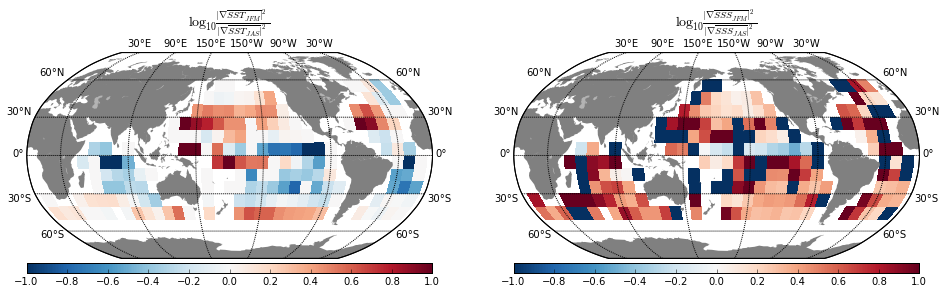

In [39]:
# j_eq_bot = 5
# j_eq_top = 7
# varSST_win[j_eq_bot:j_eq_top] = np.nan
# varSST_sum[j_eq_bot:j_eq_top] = np.nan
# varSSS_win[j_eq_bot:j_eq_top] = np.nan
# varSSS_sum[j_eq_bot:j_eq_top] = np.nan

fig = plt.figure(figsize=(16,6))

axi1 = fig.add_subplot(121)
m.fillcontinents(color='0.5', lake_color='0.7')
m.drawmapboundary(fill_color='none')
x,y = m(Lon,Lat)
pc = m.pcolormesh(x, y, np.ma.masked_invalid( np.log10(grad2SST_win / grad2SST_sum) ), cmap='RdBu_r')
pc.set_clim([-1., 1.])
axi1.set_title(r'$\log_{10}\frac{|\nabla \overline{SST_{JFM}}|^2}{|\nabla \overline{SST_{JAS}}|^2}$', y=1.10, fontsize=14)
m.drawparallels(range(-60,61,30), labels=[1,1,0,0]);
m.drawmeridians(range(30,360,60), labels=[0,0,1,1]);
cbar = m.colorbar(pc, location='bottom')
# cbar.set_label('x$10^{-10}$ $^{\circ}C^2 m^{-2}$', fontsize=14)

axi2 = fig.add_subplot(122)
m.fillcontinents(color='0.5', lake_color='0.7')
m.drawmapboundary(fill_color='none')
x,y = m(Lon,Lat)
pc = m.pcolormesh(x, y, np.ma.masked_invalid( np.log10(grad2SSS_win / grad2SSS_sum) ), cmap='RdBu_r')
pc.set_clim([-1., 1.])
axi2.set_title(r'$\log_{10}\frac{|\nabla \overline{SSS_{JFM}}|^2}{|\nabla \overline{SSS_{JAS}}|^2}$', y=1.10, fontsize=14)
m.drawparallels(range(-60,61,30), labels=[1,1,0,0]);
m.drawmeridians(range(30,360,60), labels=[0,0,1,1]);
cbar = m.colorbar(pc, location='bottom')
# cbar.set_label('x$10^{-11}$ $(g/kg)^2 m^{-2}$', fontsize=14)

plt.savefig('SSS_SST_Squared_Seasonal_Climatological_gradient_ratio.png', bbox_inches='tight')

In [200]:
npzfile = np.load('POP_Annual_Climatology_gradSSS.npz')
print npzfile.files
grad2SSS_year = npzfile['grad2SSS_year']

npzfile = np.load('POP_Annual_Climatology_gradSST.npz')
print npzfile.files
grad2SST_year = npzfile['grad2SST_year']

['grad2SSS_year']
['grad2SST_year']


NameError: name 'grad2SST_year' is not defined

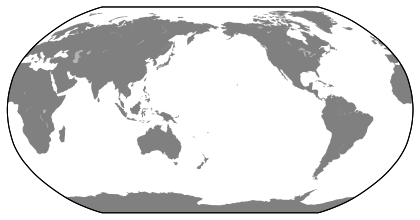

In [40]:
# j_eq_bot = 5
# j_eq_top = 7
# varSST_win[j_eq_bot:j_eq_top] = np.nan
# varSST_sum[j_eq_bot:j_eq_top] = np.nan
# varSSS_win[j_eq_bot:j_eq_top] = np.nan
# varSSS_sum[j_eq_bot:j_eq_top] = np.nan

fig = plt.figure(figsize=(16,6))

axi1 = fig.add_subplot(121)
m.fillcontinents(color='0.5', lake_color='0.7')
m.drawmapboundary(fill_color='none')
x,y = m(Lon,Lat)
# pc = m.pcolormesh(x, y, np.ma.masked_invalid( np.log10(grad2SST_year / np.nanmax(grad2SST_year)) ), cmap='jet')
pc = m.pcolormesh(x, y, np.ma.masked_invalid( np.log10(grad2SST_year) ) )
# pc.set_clim([-3., 0.])
axi1.set_title(r'$|\nabla \overline{SST_{annual}}|^2$', y=1.08, fontsize=14)
m.drawparallels(range(-60,61,30), labels=[1,1,0,0]);
m.drawmeridians(range(30,360,60), labels=[0,0,1,1]);
cbar = m.colorbar(pc, location='bottom')
cbar.set_label('$^{\circ}C^2 m^{-2}$', fontsize=14)
# plt.suptitle('Variance of seasonal climatological SST', fontsize=14)

axi2 = fig.add_subplot(122)
m.fillcontinents(color='0.5', lake_color='0.7')
m.drawmapboundary(fill_color='none')
x,y = m(Lon,Lat)
# pc = m.pcolormesh(x, y, np.ma.masked_invalid( np.log10(grad2SSS_year / np.nanmax(grad2SSS_year)) ), cmap='jet')
pc = m.pcolormesh(x, y, np.ma.masked_invalid( np.log10(grad2SSS_year) ) )
pc.set_clim([-1.3e1, -1e1])
axi2.set_title(r'$|\nabla \overline{SSS_{annual}}|^2$', y=1.08, fontsize=14)
m.drawparallels(range(-60,61,30), labels=[1,1,0,0]);
m.drawmeridians(range(30,360,60), labels=[0,0,1,1]);
cbar = m.colorbar(pc, location='bottom')
cbar.set_label('$(g/kg)^2 m^{-2}$', fontsize=14)
# plt.suptitle('Variance of seasonal climatological SSS', fontsize=14)

plt.savefig('SSS_SST_Squared_Annual_Climatological_gradient.png', bbox_inches='tight')

When we neglect external forcing, the relation between dissipation and the squared gradient of the annual climatology is

\begin{equation}
\big\langle K_e |\nabla \bar{q}|^2 \big\rangle \simeq - \chi
\end{equation}

Hence, where there are high values for $|\nabla \bar{q}|^2$, we expect high dissipation. For both passive tracers, we can assume high dissipation in the west Pacific and Atlantic in the northern hemisphere, equatorial regions and at the ACC fronts.

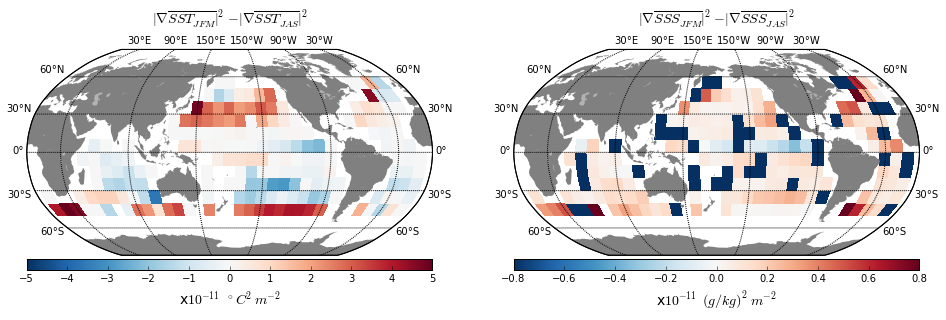

In [37]:
# j_eq_bot = 5
# j_eq_top = 7
# varSST_win[j_eq_bot:j_eq_top] = np.nan
# varSST_sum[j_eq_bot:j_eq_top] = np.nan
# varSSS_win[j_eq_bot:j_eq_top] = np.nan
# varSSS_sum[j_eq_bot:j_eq_top] = np.nan

fig = plt.figure(figsize=(16,6))

axi1 = fig.add_subplot(121)
m.fillcontinents(color='0.5', lake_color='0.7')
m.drawmapboundary(fill_color='none')
x,y = m(Lon,Lat)
pc = m.pcolormesh(x, y, np.ma.masked_invalid( grad2SST_win - grad2SST_sum )*1e11, cmap='RdBu_r')
pc.set_clim([-5., 5.])
axi1.set_title(r'$|\nabla \overline{SST_{JFM}}|^2 - |\nabla \overline{SST_{JAS}}|^2$', y=1.10, fontsize=14)
m.drawparallels(range(-60,61,30), labels=[1,1,0,0]);
m.drawmeridians(range(30,360,60), labels=[0,0,1,1]);
cbar = m.colorbar(pc, location='bottom')
cbar.set_label('x$10^{-11}$ $^{\circ}C^2 m^{-2}$', fontsize=14)

axi2 = fig.add_subplot(122)
m.fillcontinents(color='0.5', lake_color='0.7')
m.drawmapboundary(fill_color='none')
x,y = m(Lon,Lat)
pc = m.pcolormesh(x, y, np.ma.masked_invalid( grad2SSS_win - grad2SSS_sum )*1e11, cmap='RdBu_r')
pc.set_clim([-.8, .8])
axi2.set_title(r'$|\nabla \overline{SSS_{JFM}}|^2 - |\nabla \overline{SSS_{JAS}}|^2$', y=1.10, fontsize=14)
m.drawparallels(range(-60,61,30), labels=[1,1,0,0]);
m.drawmeridians(range(30,360,60), labels=[0,0,1,1]);
cbar = m.colorbar(pc, location='bottom')
cbar.set_label('x$10^{-11}$ $(g/kg)^2 m^{-2}$', fontsize=14)

plt.savefig('SSS_SST_Squared_Seasonal_Climatological_gradient_diff.png', bbox_inches='tight')